In [11]:
import torch
loss_fn = torch.nn.CrossEntropyLoss()
import utils
import pandas as pd
import numpy as np

In [2]:
loss_fn

CrossEntropyLoss()

In [2]:
    X_train, y_train, X_val, y_val, X_test, y_test, num_examples = utils.load_data_malicious(
        client_id=str(1), device='cpu', type='random', dataset='synthetic', attack_type='DP_inverted_loss')


In [3]:
X_train.shape

torch.Size([1252, 3])

In [21]:
df_test = pd.read_csv(f"data/df_{'synthetic'}_{'random'}_test.csv")


In [22]:
df_test.shape

(7324, 4)

In [12]:
config_tests = {
    "diabetes": {
        "net": {
            "model_name": "net",
            "dataset": "diabetes",
            "checkpoint_folder": "checkpoints/diabetes/net/",
            "history_folder": "histories/diabetes/net/",
            "image_folder": "images/diabetes/net/",
            "input_dim": 21,
            "output_dim": 2,
            "drop_prob": 0.3,
            "mask": torch.nn.Parameter(torch.Tensor([0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1]), requires_grad=False),
            "binary_feature": torch.nn.Parameter(torch.Tensor([1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0]).bool(), requires_grad=False),
            "mask_evaluation": torch.Tensor([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
            "lambda1": 3,
            "lambda2": 12,
            "lambda3": 1,
            "lambda4": 1.5,
            "learning_rate": 0.01,
            "learning_rate_personalization": 0.01,
            "n_epochs_personalization": 5,
            "decoder_w": ["decoder"],
            "encoder1_w": ["concept_mean_predictor", "concept_var_predictor"],
            "encoder2_w": ["concept_mean_z3_predictor", "concept_var_z3_predictor"],
            "encoder3_w": ["concept_mean_qz3_predictor", "concept_var_qz3_predictor"],
            "classifier_w": ["fc1", "fc2", "fc3", "fc4", "fc5"], 
            "to_freeze": ["concept_mean_predictor", "concept_var_predictor", "concept_mean_z3_predictor", "concept_var_z3_predictor", "concept_mean_qz3_predictor", "concept_var_qz3_predictor"],
            "output_round": True,
        },
        "vcnet": {
            "model_name": "vcnet",
            "dataset": "diabetes",
            "checkpoint_folder": "checkpoints/diabetes/vcnet/",
            "history_folder": "histories/diabetes/vcnet/",
            "image_folder": "images/diabetes/vcnet/",
            "input_dim": 21,
            "output_dim": 2,
            "drop_prob": 0.3,
            "mask": torch.nn.Parameter(torch.Tensor([0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1]), requires_grad=False),
            "binary_feature": torch.nn.Parameter(torch.Tensor([1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0]).bool(), requires_grad=False),
            "mask_evaluation": torch.Tensor([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
            "lambda1": 2,
            "lambda2": 10,
            "learning_rate": 0.01,
            "learning_rate_personalization": 0.01,
            "n_epochs_personalization": 5, 
            "decoder_w": ["decoder"],
            "encoder_w": ["concept_mean_predictor", "concept_var_predictor"],
            "classifier_w": ["fc1", "fc2", "fc3", "fc4", "fc5"],
            "to_freeze": ["concept_mean_predictor", "concept_var_predictor"],
            "output_round": True,
        },
        "predictor": {
            "model_name": "predictor",
            "dataset": "diabetes",
            "checkpoint_folder": "checkpoints/diabetes/predictor/",
            "history_folder": "histories/diabetes/predictor/",
            "image_folder": "images/diabetes/predictor/",
            "input_dim": 21,
            "output_dim": 2,
            "learning_rate": 0.01,
            "learning_rate_personalization": 0.01,
            "n_epochs_personalization": 5,
            "classifier_w": ["fc1", "fc2", "fc3", "fc4", "fc5"],
            "to_freeze": ["fc1", "fc2", "fc3"],
            "output_round": True,
        },
        "min" : np.array([0., 0., 0., 12., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.]),
        "max" : np.array([1., 1., 1., 98., 1., 1., 1., 1., 1., 1., 1., 1., 1., 5., 30., 30., 1., 1., 13., 6., 8.]),
    },
    "breast": {
        "net": {
            "model_name": "net",
            "dataset": "breast",
            "checkpoint_folder": "checkpoints/breast/net/",
            "history_folder": "histories/breast/net/",
            "image_folder": "images/breast/net/",
            "input_dim": 30,
            "output_dim": 2,
            "drop_prob": 0.3,
            "mask": torch.nn.Parameter(torch.Tensor([0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1]), requires_grad=False),  # A CASOO
            "binary_feature": torch.nn.Parameter(torch.Tensor([0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1]).bool(), requires_grad=False),
            "mask_evaluation": torch.Tensor([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
            "lambda1": 3,
            "lambda2": 12,
            "lambda3": 1,
            "lambda4": 1.5,
            "learning_rate": 0.01,
            "learning_rate_personalization": 0.01,
            "n_epochs_personalization": 5,
            "decoder_w": ["decoder"],
            "encoder1_w": ["concept_mean_predictor", "concept_var_predictor"],
            "encoder2_w": ["concept_mean_z3_predictor", "concept_var_z3_predictor"],
            "encoder3_w": ["concept_mean_qz3_predictor", "concept_var_qz3_predictor"],
            "classifier_w": ["fc1", "fc2", "fc3", "fc4", "fc5"], 
            "to_freeze": ["concept_mean_predictor", "concept_var_predictor", "concept_mean_z3_predictor", "concept_var_z3_predictor", "concept_mean_qz3_predictor", "concept_var_qz3_predictor"],
            "output_round": False,
        },
        "vcnet": {
            "model_name": "vcnet",
            "dataset": "breast",
            "checkpoint_folder": "checkpoints/breast/vcnet/",
            "history_folder": "histories/breast/vcnet/",
            "image_folder": "images/breast/vcnet/",
            "input_dim": 30,
            "output_dim": 2,
            "drop_prob": 0.3,
            "mask": torch.nn.Parameter(torch.Tensor([0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1]), requires_grad=False),  # A CASOO
            "binary_feature": torch.nn.Parameter(torch.Tensor([0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1]).bool(), requires_grad=False),
            "mask_evaluation": torch.Tensor([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
            "lambda1": 2,
            "lambda2": 10,
            "learning_rate": 0.01,
            "learning_rate_personalization": 0.01,
            "n_epochs_personalization": 5,
            "decoder_w": ["decoder"],
            "encoder_w": ["concept_mean_predictor", "concept_var_predictor"],
            "classifier_w": ["fc1", "fc2", "fc3", "fc4", "fc5"],
            "to_freeze": ["concept_mean_predictor", "concept_var_predictor"],
            "output_round": False,
        },
        "predictor": {
            "model_name": "predictor",
            "dataset": "breast",
            "checkpoint_folder": "checkpoints/breast/predictor/",
            "history_folder": "histories/breast/predictor/",
            "image_folder": "images/breast/predictor/",
            "input_dim": 30,
            "output_dim": 2,
            "learning_rate": 0.01,
            "learning_rate_personalization": 0.01,
            "n_epochs_personalization": 5,
            "classifier_w": ["fc1", "fc2", "fc3", "fc4", "fc5"],
            "to_freeze": ["fc1", "fc2", "fc3"],
            "output_round": False,
        },
        "min" : np.array([6.981e+00, 9.710e+00, 4.379e+01, 1.435e+02, 5.263e-02, 1.938e-02,
                                0.000e+00, 0.000e+00, 1.060e-01, 4.996e-02, 1.115e-01, 3.602e-01,
                                7.570e-01, 6.802e+00, 1.713e-03, 2.252e-03, 0.000e+00, 0.000e+00,
                                7.882e-03, 8.948e-04, 7.930e+00, 1.202e+01, 5.041e+01, 1.852e+02,
                                7.117e-02, 2.729e-02, 0.000e+00, 0.000e+00, 1.565e-01, 5.504e-02]),
        "max" : np.array([2.811e+01, 3.928e+01, 1.885e+02, 2.501e+03, 1.634e-01, 3.454e-01,
                                4.268e-01, 2.012e-01, 3.040e-01, 9.744e-02, 2.873e+00, 4.885e+00,
                                2.198e+01, 5.422e+02, 3.113e-02, 1.354e-01, 3.960e-01, 5.279e-02,
                                7.895e-02, 2.984e-02, 3.604e+01, 4.954e+01, 2.512e+02, 4.254e+03,
                                2.226e-01, 1.058e+00, 1.252e+00, 2.910e-01, 6.638e-01, 2.075e-01]),
    },
    "synthetic": {
        "net": {
            "model_name": "net",
            "dataset": "synthetic",
            "checkpoint_folder": "checkpoints/synthetic/net/",
            "history_folder": "histories/synthetic/net/",
            "image_folder": "images/synthetic/net/",
            "input_dim": 3,
            "output_dim": 2,
            "drop_prob": 0.3,
            "mask": torch.nn.Parameter(torch.Tensor([0,0]), requires_grad=False),
            "binary_feature": torch.nn.Parameter(torch.Tensor([0,0]).bool(), requires_grad=False),
            "mask_evaluation": torch.Tensor([0,0]),
            "lambda1": 3,
            "lambda2": 12,
            "lambda3": 3,
            "lambda4": 20,
            "learning_rate": 0.01,
            "learning_rate_personalization": 0.01,
            "n_epochs_personalization": 70,
            "decoder_w": ["decoder"],
            "encoder1_w": ["concept_mean_predictor", "concept_var_predictor"],
            "encoder2_w": ["concept_mean_z3_predictor", "concept_var_z3_predictor"],
            "encoder3_w": ["concept_mean_qz3_predictor", "concept_var_qz3_predictor"],
            "classifier_w": ["fc1", "fc2", "fc3", "fc4", "fc5"],
            "to_freeze": ["fc1", "fc2", "fc3", "fc4", "fc5", "concept_mean_predictor", "concept_var_predictor"],
            "output_round": False,
        },
        "vcnet": {
            "model_name": "vcnet",
            "dataset": "synthetic",
            "checkpoint_folder": "checkpoints/synthetic/vcnet/",
            "history_folder": "histories/synthetic/vcnet/",
            "image_folder": "images/synthetic/vcnet/",
            "input_dim": 3,
            "output_dim": 2,
            "drop_prob": 0.3,
            "mask": torch.nn.Parameter(torch.Tensor([0,0]), requires_grad=False),
            "binary_feature": torch.nn.Parameter(torch.Tensor([0,0]).bool(), requires_grad=False),
            "mask_evaluation": torch.Tensor([0,0]),
            "lambda1": 2,
            "lambda2": 10,
            "learning_rate": 0.01,
            "learning_rate_personalization": 0.01,
            "n_epochs_personalization": 5,
            "decoder_w": ["decoder"],
            "encoder_w": ["concept_mean_predictor", "concept_var_predictor"],
            "classifier_w": ["fc1", "fc2", "fc3", "fc4", "fc5"],
            "to_freeze": ["concept_mean_predictor", "concept_var_predictor"],
            "output_round": False,
        },
        "predictor": {
            "model_name": "predictor",
            "dataset": "synthetic",
            "checkpoint_folder": "checkpoints/synthetic/predictor/",
            "history_folder": "histories/synthetic/predictor/",
            "image_folder": "images/synthetic/predictor/",
            "input_dim": 3,
            "output_dim": 2,
            "learning_rate": 0.01,
            "learning_rate_personalization": 0.01,
            "n_epochs_personalization": 5,
            "classifier_w": ["fc1", "fc2", "fc3", "fc4", "fc5"],
            "to_freeze": ["fc1", "fc2", "fc3"],
            "output_round": False,
        },
        "min" : np.array([-5., -5., -5]),
        "max" : np.array([5., 5., 5.]),
        
    }
}


In [23]:
def min_max_scaler(X, dataset="diabetes", feature_range=(0, 1)):
    X_min = config_tests[dataset]['min']
    X_max = config_tests[dataset]['max']
    
    # Scale X using its own minimum and maximum, this will produce a normalized version of X
    X_std = (X - X_min) / (X_max - X_min)
    
    # Scale X_std to the feature_range
    min, max = feature_range
    X_scaled = X_std * (max - min) + min
    
    return X_scaled

In [15]:
dataset = "synthetic"
X_min = config_tests[dataset]['min']
X_max = config_tests[dataset]['max']

In [17]:
X_max

array([5., 5., 5.])

In [14]:
X = df_test.drop('Labels', axis=1)
y = df_test['Labels']

X_test = min_max_scaler(X.values, dataset='synthetic')

ValueError: operands could not be broadcast together with shapes (3662,2) (3,) 

In [18]:
X.shape

(3662, 2)

In [24]:
np.zeros((222, 2)).shape

(222, 2)

In [1]:
import os 
import argparse
import utils
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

n_clients_per_dataset = {
    'diabetes': 3,
    'breast': 3,
    'synthetic': 20
}
dataset = 'synthetic'
n_clients = n_clients_per_dataset[dataset]
data_type = 'random'
model = 'net'
n_epochs = 10

# main
# print model
# check gpu and set manual seed
device = utils.check_gpu(manual_seed=True)

# load data from all clients 
X_train_list, y_train_list, X_val_list, y_val_list = [], [], [], []
for client_id in range(1, 20+1):
    X_train, y_train, X_val, y_val, _, _, _ = utils.load_data(
        client_id=str(client_id), device=device, type=data_type, dataset=dataset)
    X_train_list.append(X_train)
    y_train_list.append(y_train)
    X_val_list.append(X_val)
    y_val_list.append(y_val)

# concatenate all data
X_train = torch.cat(X_train_list, dim=0)
y_train = torch.cat(y_train_list, dim=0)
X_val = torch.cat(X_val_list, dim=0)
y_val = torch.cat(y_val_list, dim=0)

# model and history folder
model_network = utils.models[model]
train_fn = utils.trainings[model]
evaluate_fn = utils.evaluations[model]
plot_fn = utils.plot_functions[model]
config = utils.config_tests[dataset][model]

# Model
model = model_network(config=config).to(device)

# Optimizer and Loss function
optimizer = torch.optim.SGD(model.parameters(), lr=config["learning_rate"], momentum=0.9)

# Loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Training
model, loss_train, loss_val, acc, acc_prime, acc_val = train_fn(
    model, loss_fn, optimizer, X_train, y_train, 
    X_val, y_val, n_epochs=n_epochs, save_best=True, print_info=False,config=config)

# Save model
if not os.path.exists(config['checkpoint_folder'] + f"{data_type}"):
    os.makedirs(config['checkpoint_folder'] + f"{data_type}")
model_path = config['checkpoint_folder'] + f"{data_type}/privacy_intrusive_CL.pth"
torch.save(model.state_dict(), model_path)



MPS is available


In [3]:
loss_train

[18.844743728637695,
 15.011959075927734,
 12.059072494506836,
 10.841259002685547,
 10.732672691345215,
 10.73654842376709,
 10.545574188232422,
 10.1520414352417,
 9.930130004882812,
 9.890220642089844]


Client all 
Minimum Loss occurred at round 6 with a loss value of 0.6929676532745361 
Maximum Accuracy occurred at round 1 with an accuracy value of 0.5003404021263123


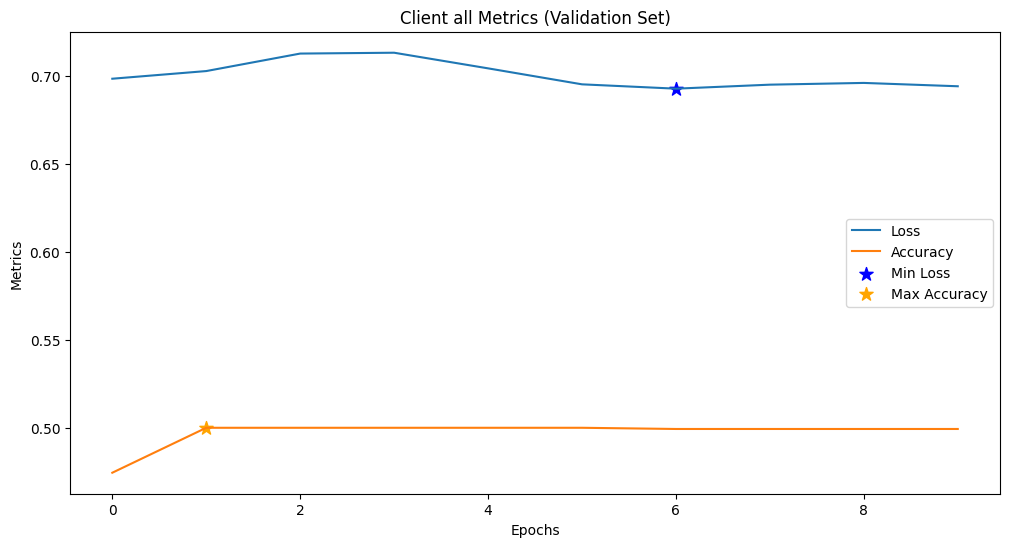

In [4]:
# Plot loss and accuracy using the previous lists
utils.plot_loss_and_accuracy_centralized(loss_val, acc_val, data_type=data_type, client_id="all", image_folder=config['image_folder'], show=False, name_fig="privacy_intrusive_CL")



In [8]:
    best_model_round=None
    model=model_network
    model_path=model_path
  
    # read arguments
    data_type=data_type
    dataset=dataset

    # check device
    
    # load data
    df_test = pd.read_csv(f"data/df_{dataset}_{data_type}_test.csv")
    if dataset == "breast":
        df_test = df_test.drop(columns=["Unnamed: 0"])
    #df_test = df_test.astype(int)
    # Dataset split
    X = df_test.drop('Labels', axis=1)
    y = df_test['Labels']

    # scale data
    X_test = utils.min_max_scaler(X.values, dataset=dataset)
    X_test = torch.Tensor(X_test).float().to(device)

    model = model(config).to(device)
    if best_model_round == None:
        model.load_state_dict(torch.load(model_path))
    else:
        model.load_state_dict(torch.load(config['checkpoint_folder'] + f"{data_type}/model_round_{best_model_round}.pth"))
    # evaluate
    model.eval()
    with torch.no_grad():
        if model.__class__.__name__ == "Net":
            H_test, x_reconstructed, q, p, H2_test, x_prime, q_prime, p_prime, y_prime = model(X_test, include=False)
        elif model.__class__.__name__ == "ConceptVCNet":
            H_test, x_reconstructed, q, y_prime, H2_test = model(X_test, include=False)
            x_prime = x_reconstructed

    X_test_rescaled = utils.inverse_min_max_scaler(X_test.detach().cpu().numpy(), dataset=dataset)
    x_prime_rescaled = utils.inverse_min_max_scaler(x_prime.detach().cpu().numpy(), dataset=dataset)
    if config["output_round"]:
        X_test_rescaled = np.round(X_test_rescaled)
        x_prime_rescaled = np.round(x_prime_rescaled)
        
    # visualize
    utils.visualize_examples(H_test, H2_test, x_prime_rescaled, y_prime, X_test_rescaled, data_type, dataset, config=config)
    # return H_



Visualizing the results of the best model (random) on the test set (synthetic)...


In [13]:
    print(f"\n\n\033[95mVisualizing the results of the best model ({data_type}) on the test set ({dataset})...\033[0m")
    if dataset == "diabetes":
        features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
        'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
        'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
        'Income']  
    elif dataset == "breast":
        features = ['radius1', 'texture1', 'perimeter1', 'area1',
       'smoothness1', 'compactness1', 'concavity1', 'concave_points1',
       'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',
       'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'] 
    elif dataset == "synthetic":
        features = ['x1', 'x2','x3']
    else:
        # raise error: "Error: dataset not found in visualize_examples"
        raise ValueError("Error: dataset not found in visualize_examples")        
    

    j = 0
    if config["output_round"]:
        X_test_rescaled = np.rint(X_test_rescaled).astype(int)
        x_prime_rescaled = np.rint(x_prime_rescaled).astype(int)
    for i, s in enumerate(X_test_rescaled):
        print(f'Patient {i+1}: Diabetes level = {H_test[i].argmax()}')
        if j > 5:
            break
        if H2_test[i].argmax() == y_prime[i].argmax():
            j += 1
            print('--------------------------')
            print(f'Patient {j}: Diabetes level = {H_test[i].argmax()}')
            print(f'Features to change to make the Diabetes level = {H2_test[i].argmax()}')
            c = 0
            for el in X_test_rescaled[i] != x_prime_rescaled[i]:
                if el:
                    print(f'Feature: {features[c]} from {X_test_rescaled[i][c]:.4f} to {x_prime_rescaled[i][c]:.4f}')
                c += 1



Visualizing the results of the best model (random) on the test set (synthetic)...
Patient 1: Diabetes level = 0
Patient 2: Diabetes level = 0
Patient 3: Diabetes level = 0
Patient 4: Diabetes level = 0
Patient 5: Diabetes level = 0
Patient 6: Diabetes level = 0
Patient 7: Diabetes level = 0
Patient 8: Diabetes level = 0
Patient 9: Diabetes level = 0
Patient 10: Diabetes level = 0
Patient 11: Diabetes level = 0
Patient 12: Diabetes level = 0
Patient 13: Diabetes level = 0
Patient 14: Diabetes level = 0
Patient 15: Diabetes level = 0
Patient 16: Diabetes level = 0
Patient 17: Diabetes level = 0
Patient 18: Diabetes level = 0
Patient 19: Diabetes level = 0
Patient 20: Diabetes level = 0
Patient 21: Diabetes level = 0
Patient 22: Diabetes level = 0
Patient 23: Diabetes level = 0
Patient 24: Diabetes level = 0
Patient 25: Diabetes level = 0
Patient 26: Diabetes level = 0
Patient 27: Diabetes level = 0
Patient 28: Diabetes level = 0
Patient 29: Diabetes level = 0
Patient 30: Diabetes level

In [5]:
args = argparse.Namespace(
    dataset=dataset,
    data_type=data_type,
    model=model,
    n_epochs=n_epochs,
    n_clients=n_clients,
    device=device,
    model_path=model_path,
    config=config
)
# Evaluate the model on the test set
if model == 'predictor': # adjust this code
    y_test_pred, accuracy = utils.evaluation_central_test_predictor(args, best_model_round=None, model_path=model_path)
    print(f"Accuracy on test set: {accuracy}")
else:
    utils.evaluation_central_test(args, best_model_round=None, model=model_network, model_path=model_path, config=config)
    
    # Evaluate distance with all training sets
    utils.evaluate_distance(args, best_model_round=None, model_fn=model_network, model_path=model_path, config=config, spec_client_val=True, client_id=client_id, centralized=True, add_name="privacy_intrusive_CL")




Visualizing the results of the best model (random) on the test set (synthetic)...

Evaluation on General Testing Set - Server
Counterfactual validity: 0.0000
Counterfactual accuracy: 0.5019
Distance Evaluation - Counterfactual: Training Set
Mean distance with all training sets (proximity, hamming proximity, relative proximity): 4.5001, 2.9982, 0.6832
Mean distance with training set 1 (proximity, hamming proximity, relative proximity): 9.1725, 3.0000, 0.9970
Mean distance with training set 2 (proximity, hamming proximity, relative proximity): 9.1870, 3.0000, 0.9914
Mean distance with training set 3 (proximity, hamming proximity, relative proximity): 8.9732, 3.0000, 0.9830
Mean distance with training set 4 (proximity, hamming proximity, relative proximity): 9.7234, 3.0000, 0.9949
Mean distance with training set 5 (proximity, hamming proximity, relative proximity): 9.3256, 3.0000, 0.9972
Mean distance with training set 6 (proximity, hamming proximity, relative proximity): 8.8983, 2.9999